In [1]:
source('functions.R')

DATASET_FILENAME = './combined.csv'
OUTPUT_FIELD = "satisfactionv2"

MYLIBRARIES<-c("outliers",
               "corrplot",
               "formattable",
               "stats",
               "caret",
               "PerformanceAnalytics",
               "stringr",
               "partykit",
               "C50",
               "randomForest",
               #"keras",
               "h2o")

install.packages('e1071')
library(caret)
library(e1071)
library(randomForest)
library(datasets)
library(caret)
# ************************************************
# This is where R starts execution

# Automatically release memory
gc()

# Tries to clear plots and other graphics in RStudio output
if(!is.null(dev.list())) dev.off()
graphics.off()

# This clears all warning messages
#assign("last.warning", NULL, envir = baseenv())

# clears the RStudio console area
cat("\014")

# If library not already on your computer this will download and
# install the library. Each library is activated.
library(pacman)
pacman::p_load(char=MYLIBRARIES,install=TRUE,character.only=TRUE)

Warning message in install.packages("e1071"):
“installation of package ‘e1071’ had non-zero exit status”
Updating HTML index of packages in '.Library'

Making 'packages.html' ...
 done

Loading required package: ggplot2

Loading required package: lattice

randomForest 4.7-1.1

Type rfNews() to see new features/changes/bug fixes.


Attaching package: ‘randomForest’


The following object is masked from ‘package:ggplot2’:

    margin




,used,(Mb),gc trigger,(Mb),max used,(Mb)
Ncells,2306864,123.2,4500947,240.4,3670518,196.1
Vcells,3943539,30.1,8388608,64.0,7607988,58.1


null device 
          1

In [2]:
OUTPUT_FIELD = "satisfactionv2"
processed_training<- NreadDataset('processed.csv')
processed_training

# remmove unwanted fields
p<-c("X")#,"DepartureDelayinMinutes0" ,"DepartureDelayinMinutes1","DepartureDelayinMinutes2","DepartureDelayinMinutes3","ArrivalDelayinMinutes0",
   # "ArrivalDelayinMinutes1","ArrivalDelayinMinutes2","ArrivalDelayinMinutes3")

processed_training<-processed_training[,names(processed_training [-which(names(processed_training)%in% p)])]


select_field<-c('satisfactionv2',
                'Gender',
                'CustomerType',
                'TypeofTravel',
                'ClassBusiness',
                'ClassEco',
                'ClassEcoPlus',
                'DepartureDelayinMinutes0',
                'DepartureDelayinMinutes1',
                'DepartureDelayinMinutes2',
                'DepartureDelayinMinutes3',
                'ArrivalDelayinMinutes0',
                'ArrivalDelayinMinutes1',
                'ArrivalDelayinMinutes2',
                'ArrivalDelayinMinutes3',
                'Age',
                'Seatcomfort',
                'DepartureArrivaltimeconvenient',
                'Foodanddrink',
                'Gatelocation',
                'Inflightwifiservice',
                'Inflightentertainment',
                'EaseofOnlinebooking',
                'Onboardservice',
                'Legroomservice',
                'Baggagehandling',
                'Checkinservice',
                'Cleanliness',
                'Onlineboarding')

print("Select Fields")
print(select_field)

#processed_training<-processed_training[,select_field]
processed_training<-processed_training[sample(nrow(processed_training)),]
training_records<-round(nrow(processed_training)*(70/100))
training_data <- processed_training[1:training_records,]
testing_data <- processed_training[-(1:training_records),]

print(paste("Number of Training",nrow(training_data)))
print(paste("Number of Testing",nrow(testing_data)))


[1] "CSV dataset processed.csv has been read. Records= 259760"


X,satisfactionv2,Gender,CustomerType,TypeofTravel,ClassBusiness,ClassEco,ClassEcoPlus,DepartureDelayinMinutes0,DepartureDelayinMinutes1,⋯,Gatelocation,Inflightwifiservice,Inflightentertainment,EaseofOnlinebooking,Onboardservice,Legroomservice,Baggagehandling,Checkinservice,Cleanliness,Onlineboarding
<int>,<int>,<int>,<int>,<int>,<int>,<int>,<int>,<int>,<int>,⋯,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
1,1,1,0,0,0,1,0,1,0,⋯,0.4,0.4,0.8,0.6,0.6,0.0,0.6,1.0,0.6,0.4
2,1,0,0,0,1,0,0,0,0,⋯,0.6,0.0,0.4,0.6,0.8,0.8,0.8,0.4,0.6,0.4
3,1,1,0,0,0,1,0,1,0,⋯,0.6,0.4,0.0,0.4,0.6,0.6,0.8,0.8,0.8,0.4
4,1,1,0,0,0,1,0,1,0,⋯,0.6,0.6,0.8,0.2,0.2,0.0,0.2,0.8,0.2,0.6
5,1,1,0,0,0,1,0,1,0,⋯,0.6,0.8,0.6,0.4,0.4,0.0,0.4,0.8,0.4,1.0
6,1,0,0,0,0,1,0,1,0,⋯,0.6,0.4,0.0,0.4,1.0,0.8,1.0,1.0,0.8,0.4
7,1,1,0,0,0,1,0,0,1,⋯,0.6,0.4,1.0,1.0,1.0,0.0,1.0,1.0,1.0,0.6
8,1,0,0,0,0,1,0,1,0,⋯,0.6,0.4,0.0,0.4,0.6,0.6,0.8,1.0,0.8,0.4
9,1,1,0,0,1,0,0,1,0,⋯,0.6,1.0,0.6,0.8,0.8,0.0,0.2,1.0,0.8,0.8


[1] "Select Fields"
 [1] "satisfactionv2"                 "Gender"                        
 [3] "CustomerType"                   "TypeofTravel"                  
 [5] "ClassBusiness"                  "ClassEco"                      
 [7] "ClassEcoPlus"                   "DepartureDelayinMinutes0"      
 [9] "DepartureDelayinMinutes1"       "DepartureDelayinMinutes2"      
[11] "DepartureDelayinMinutes3"       "ArrivalDelayinMinutes0"        
[13] "ArrivalDelayinMinutes1"         "ArrivalDelayinMinutes2"        
[15] "ArrivalDelayinMinutes3"         "Age"                           
[17] "Seatcomfort"                    "DepartureArrivaltimeconvenient"
[19] "Foodanddrink"                   "Gatelocation"                  
[21] "Inflightwifiservice"            "Inflightentertainment"         
[23] "EaseofOnlinebooking"            "Onboardservice"                
[25] "Legroomservice"                 "Baggagehandling"               
[27] "Checkinservice"                 "Cleanliness"      

In [6]:

# ************************************************
# Nauroc() :
#
# Calculate the Area Under Curve (AUC) for ROC
#
# INPUT   :   vector double     - score            - probability of being class 1
#             vector double     - bool             - Expected class of 0 or 1
#
# OUTPUT  :   double   - AUC
#
# ************************************************
# By Miron Kursa https://mbq.me
# See https://stackoverflow.com/questions/4903092/calculate-auc-in-r

auroc <- function(score, bool) {
  n1 <- sum(!bool)
  n2 <- sum(bool)
  U  <- sum(rank(score)[!bool]) - n1 * (n1 + 1) / 2
  return(1 - U / n1 / n2)
}

# ************************************************
# NdetermineThreshold() :
#
# For the range of threholds [0,1] calculate a confusion matrix
# and classifier metrics.
# Deterime "best" threshold based on either distance or Youdan
# Plot threshold chart and ROC chart
#
# Plot the results
#
# INPUT   :   vector double  - test_predicted   - probability of being class 1
#         :   vector double  - test_expected    - dataset to evaluate
#         :   boolean        - plot             - TRUE=output charts
#         :   string         - title            - chart title
#
# OUTPUT  :   List       - Named evaluation measures from confusion matrix
#                        - Threshold at min Euclidean distance
#                        - AUC - area under the ROC curve
#                        - Predicted class probability
#
# 241019NRT - added plot flag and title for charts
# 311019NRT - added axis bound checks in abline plots
# 191020NRT - Updated to use own ROC plot & calculate AUC
# ************************************************
NdetermineThreshold<-function(test_predicted,
                              test_expected,
                              plot=TRUE,
                              title=""){
    print("Threshold")
  toPlot<-data.frame()

  #Vary the threshold
  for(threshold in seq(0,1,by=0.01)){
  
    results<-eval_Forest(proba=test_predicted,
                                gt_label=test_expected,
                                threshold=threshold)
    toPlot<-rbind(toPlot,data.frame(x=threshold,fpr=results$FPR,tpr=results$TPR))
  }

  # the Youden index is the vertical distance between the 45 degree line
  # and the point on the ROC curve.
  # Higher values of the Youden index are better than lower values.
  # https://www.ncbi.nlm.nih.gov/pmc/articles/PMC5082211/
  # Youdan = sensitivty + specificity -1
  #        = TPR + (1-FPR) -1

  toPlot$youdan<-toPlot$tpr+(1-toPlot$fpr)-1

  # 121020NRT - max Youdan
  # use which.max() to return a single index to the higest value in the vector
  maxYoudan<-toPlot$x[which.max(toPlot$youdan)]

  # Euclidean distance sqrt((1 − sensitivity)^2+ (1 − specificity)^2)
  # To the top left (i.e. perfect classifier)
  toPlot$distance<-sqrt(((100-toPlot$tpr)^2)+((toPlot$fpr)^2))

  # 121020NRT - Euclidean distance to "perfect" classifier (smallest the best)
  # use which.min() to return a single index to the lowest value in the vector
  minEuclidean<-toPlot$x[which.min(toPlot$distance)]

  # ************************************************
  # Plot threshold graph

  if (plot==TRUE){
    # Sensitivity (TPR)
    plot(toPlot$x,toPlot$tpr,
         xlim=c(0, 1), ylim=c(0, 100),
         type="l",lwd=3, col="blue",
         xlab="Threshold",
         ylab="%Rate",
         main=paste("Threshold Perfomance Classifier Model",title))

    # Plot the specificity (1-FPR)
    lines(toPlot$x,100-toPlot$fpr,type="l",col="red",lwd=3,lty=1)

    # The point where specificity and sensitivity are the same
    crosspoint<-toPlot$x[which(toPlot$tpr<(100-toPlot$fpr))[1]]

    if (!is.na(crosspoint)){
      if ((crosspoint<1) & (crosspoint>0))
        abline(v=crosspoint,col="red",lty=3,lwd=2)
    }

    # Plot the Euclidean distance to "perfect" classifier (smallest the best)
    lines(toPlot$x,toPlot$distance,type="l",col="green",lwd=2,lty=3)

    # Plot the min distance, as might be more (311019NRT check it is within range)
    if ((minEuclidean<1) & (minEuclidean>0))
      abline(v=minEuclidean,col="green",lty=3,lwd=2)

    # Youdan (Vertical distance between the 45 degree line and the point on the ROC curve )
    lines(toPlot$x,toPlot$youdan,type="l",col="purple",lwd=2,lty=3)

    if ((maxYoudan<1) & (maxYoudan>0))
      abline(v=maxYoudan,col="purple",lty=3,lwd=2)

    legend("bottom",c("TPR","1-FPR","Distance","Youdan"),col=c("blue","red","green","purple"),lty=1:2,lwd=2)
    text(x=0,y=50, adj = c(-0.2,2),cex=1,col="black",paste("THRESHOLDS:\nEuclidean=",minEuclidean,"\nYoudan=",maxYoudan))

    # ************************************************
    # 121020NRT ROC graph

    sensitivityROC<-toPlot$tpr[which.min(toPlot$distance)]
    specificityROC<-100-toPlot$fpr[which.min(toPlot$distance)]
    auc<-auroc(score=test_predicted,bool=test_expected) # Estimate the AUC

    # Set origin point for plotting
    toPlot<-rbind(toPlot,data.frame(x=0,fpr=0,tpr=0, youdan=0,distance=0))

    plot(toPlot$fpr/100,toPlot$tpr/100,type="l",lwd=3, col="red",
         main=paste("ROC:",title),
         xlab="Specificity (1-FPR) %",
         ylab="Sensitivity (TPR) %",
    )
    

    axis(1, seq(0.0,100,10))
    axis(2, seq(0.0,100,10))

    #Add crosshairs to the graph
    abline(h=sensitivityROC/100,col="green",lty=3,lwd=2)
    abline(v=1-(specificityROC/100),col="green",lty=3,lwd=2)
    abline(c(0,0),c(1,1),col="black",lty=3,lwd=2)

    annotate<-paste("Threshold: ",round(minEuclidean,digits=4L),
                    "\nTPR: ",round(sensitivityROC,digits=2L),
                    "%\n1-FPR: ",round(specificityROC,digits=2L),
                    #"%\nAUC: ",round(auc,digits=2L),
                    sep="")

    text(x=1-(specificityROC/100), y=(sensitivityROC/100), adj = c(-0.2,1.2),cex=1, col="red",annotate)
    auc_legend = paste("AUC = ", round(auc,digits=2L))
      
      
    legend("bottom",c(auc_legend,'Random Classifier'), col=c("red",'black'),lty=c('solid','dashed') ,ity=1:2, lwd=2)

  } # endof if plotting

  # Select the threshold - I have choosen distance

  myThreshold<-minEuclidean      # Min Distance should be the same as analysis["threshold"]

  #Use the "best" distance threshold to evaluate classifier
  results<-eval_Forest(proba=test_predicted,
                                gt_label=test_expected,
                                threshold=myThreshold)

  results$threshold<-myThreshold
  results$AUC<-auroc(score=test_predicted,bool=test_expected) # Estimate the AUC

  return(results)
} #endof myPerformancePlot()







# modified function from lab
eval_Forest<-function(proba, gt_label,threshold){
    

    pred_label<-ifelse(proba<threshold,0,1)
    # Confusion matrix table
    cm<-table(factor(pred_label,levels=0:1), factor(gt_label, levels=0:1))
    # True positive
    TP<-as.double(cm[2,2])
    # False Negative 
    FN<-as.double(cm[1,2])
    # False Positive 
    FP<-as.double(cm[2,1])
    # True Negative 
    TN<-as.double(cm[1,1])
    
    # accuracy
    acc<- 100.0 *((TP+TN)/(TP+FP+FN+TN))
    
    # precision
    pgood<-100.0*(TP/(TP+FP))
    pbad<-100.0*(TN/(FN+TN))
    # False positive rate
    FPR<-100.0*(FP/(FP+TN))
    # True positive rate OR RECALL
    TPR<-100.0*(TP/(TP+FN))
    # True negative rate 
    TNR<-100.0*(TN/(FP+TN))
    #  Mathhew's Correlation Coefficient
    MCC<-((TP*TN)-(FP*FN))/sqrt((TP+FP)*(TP+FN)*(TN+FP)*(TN+FN))
    
   
    output<- list("TP"=TP,
                  "FN"=FN, 
                  "FP"=FP,
                  "TN"=TN, 
                  "acc"=acc,
                  "pgood"=pgood,
                  "pbad"=pbad,
                  "FPR"=FPR,
                  "TPR"=TPR,
                  "TNR"=TNR,
                  "MCC"=MCC)
    
    return(output)
}

TreeCoeff_plot<-function(DT){
library(RColorBrewer)
coul <- brewer.pal(5, "Set2")
importance<-C50::C5imp(DT, metric = "usage")
names(importance)<-"Strength"

importance<-importance[order(importance$Strength,decreasing=FALSE),,drop=FALSE]

print(formattable::formattable(importance))
# Plot the importance fields

barplot(t(importance),las=2,border = 0, cex.names =0.7, main="Decision Tree", col=coul ,horiz=T)
}

[1] 0 0 1 1 0 0
[1] "Threshold"


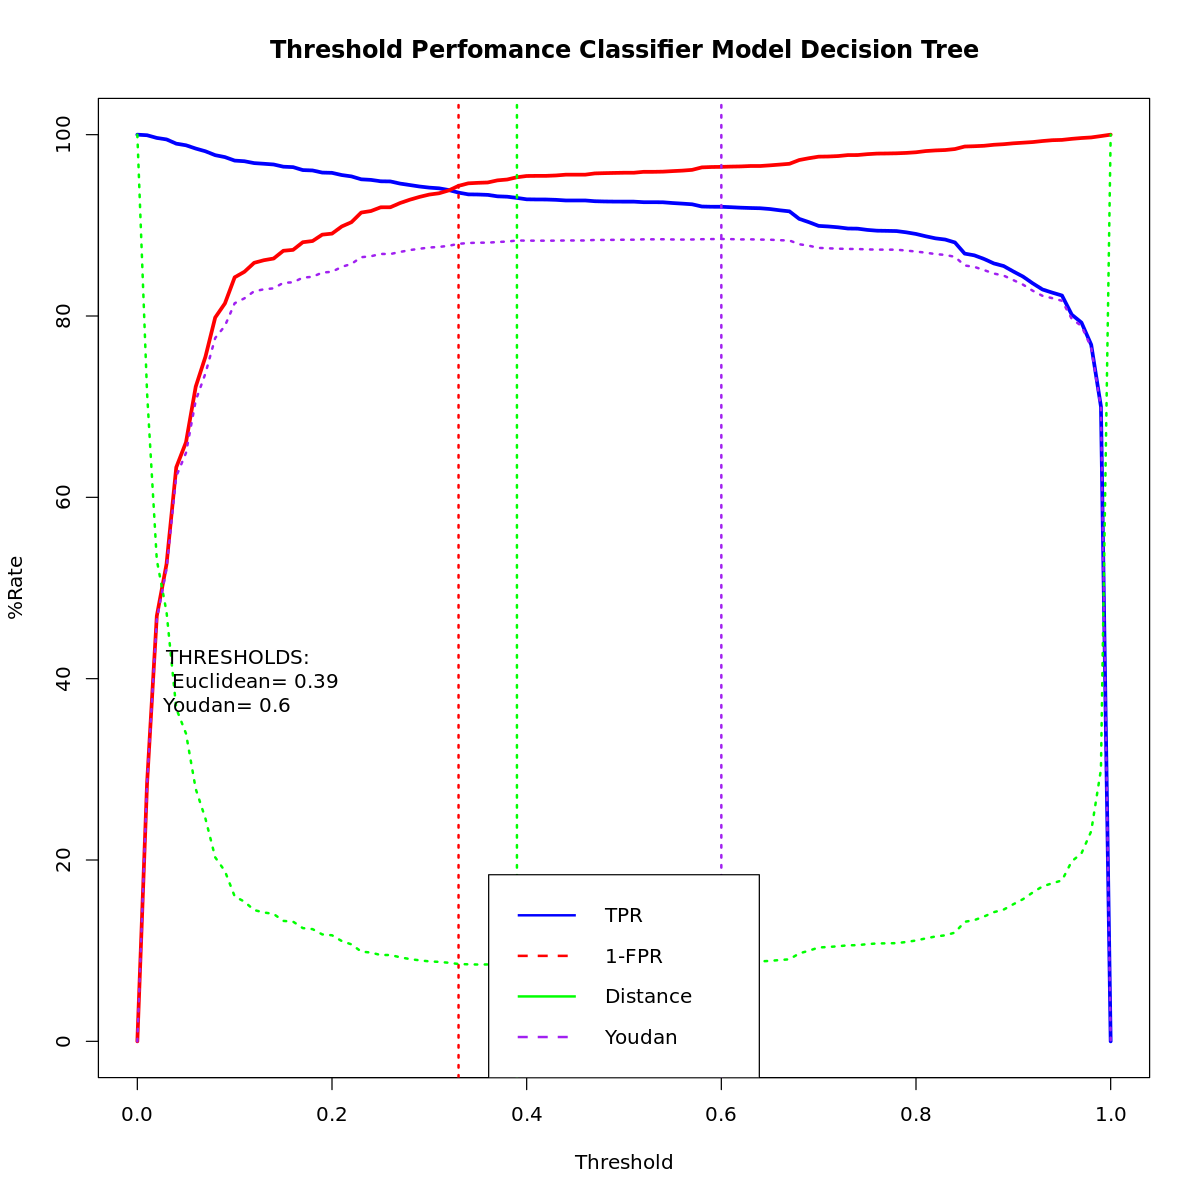

[1] "Accuracy :  94.184375320809  Precision :   Recall :  93.0240460010455  AUC :  0.984019163816604"


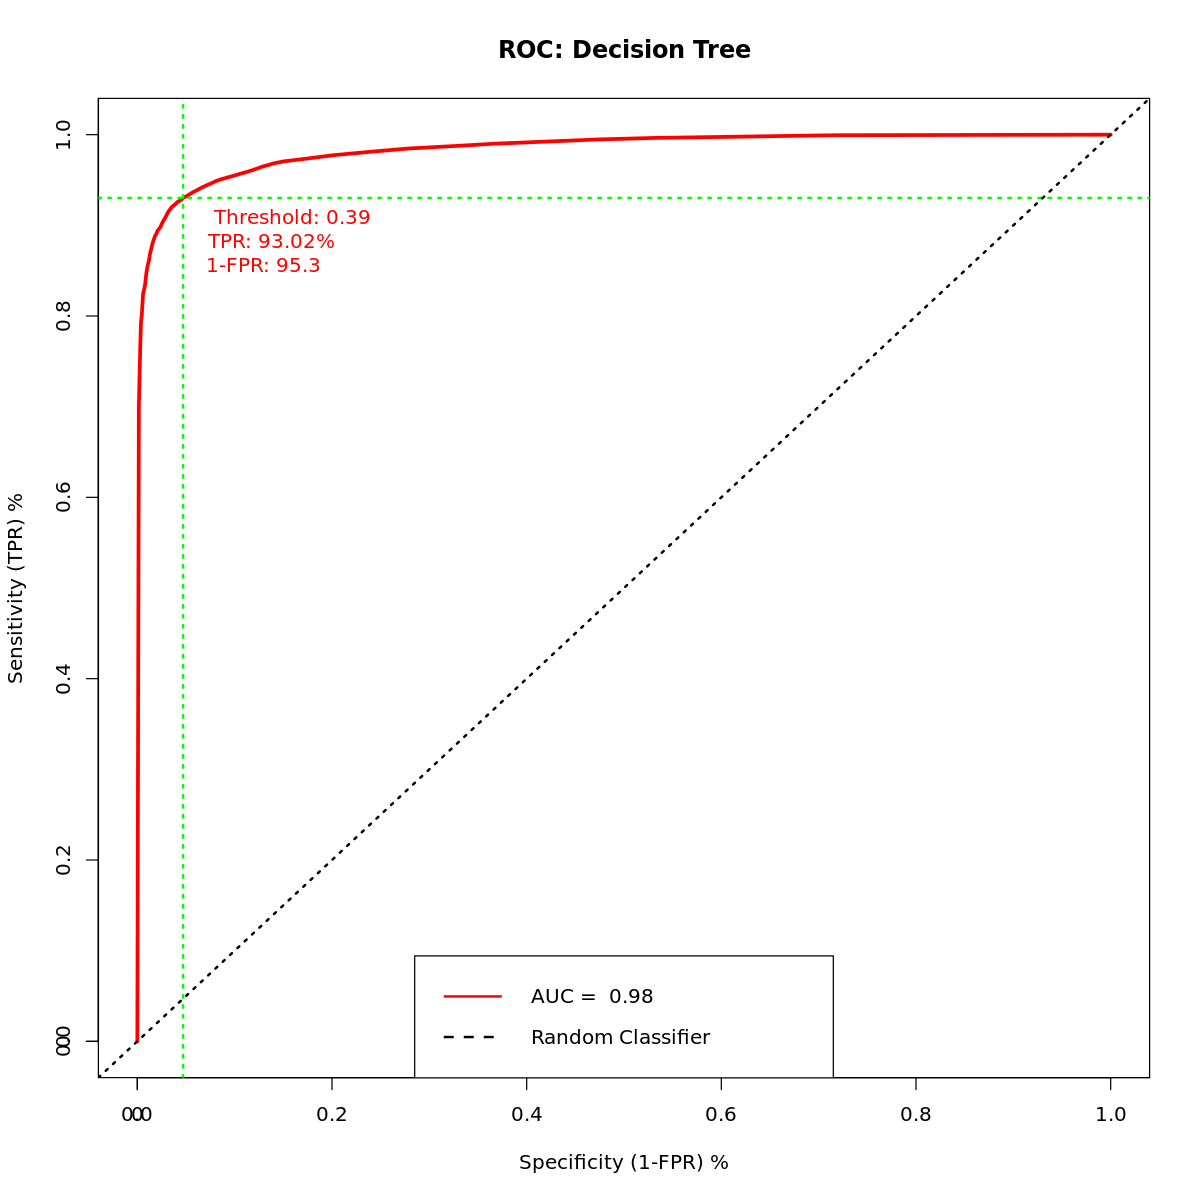

In [7]:

DecisionTree<-function(training_data, testing_data,output_field){
    
    

# Training data
x_train<-training_data[,names(training_data [-which(names(training_data)%in% output_field)])]
y_train<-training_data[,output_field]
# Testing data
x_test<-testing_data[,names(training_data [-which(names(testing_data)%in% output_field)])]
y_test<-testing_data[,output_field]


print(head(y_train))
DTmodel<-C50::C5.0(x=x_train,
                  y=factor(y_train),
                  ,
                  trials=1)
    
#y_pred<-predict()
    
    
class_proba<-predict(DTmodel, newdata=x_test, type="prob")

# Get the column index with the class label
classIndex<-which(as.numeric(colnames(class_proba))==1)

# Get the probabilities for classifying the good loans
y_proba<-class_proba[,classIndex]


title<-'Decision Tree'
results<-NdetermineThreshold(test_expected=y_test,
                                test_predicted=y_proba,
                                plot=TRUE,
                                title=title)

accuracy<-results$acc
precision<-results$pgood
recall<-results$TPR
auc<-results$AUC
    
print(paste("Accuracy : ", accuracy, " Precision : ", " Recall : ", recall, " AUC : ",auc))

    
return(DTmodel)
}
options(repr.plot.width = 10, repr.plot.height = 10)
DT<-DecisionTree(training_data,testing_data,OUTPUT_FIELD)

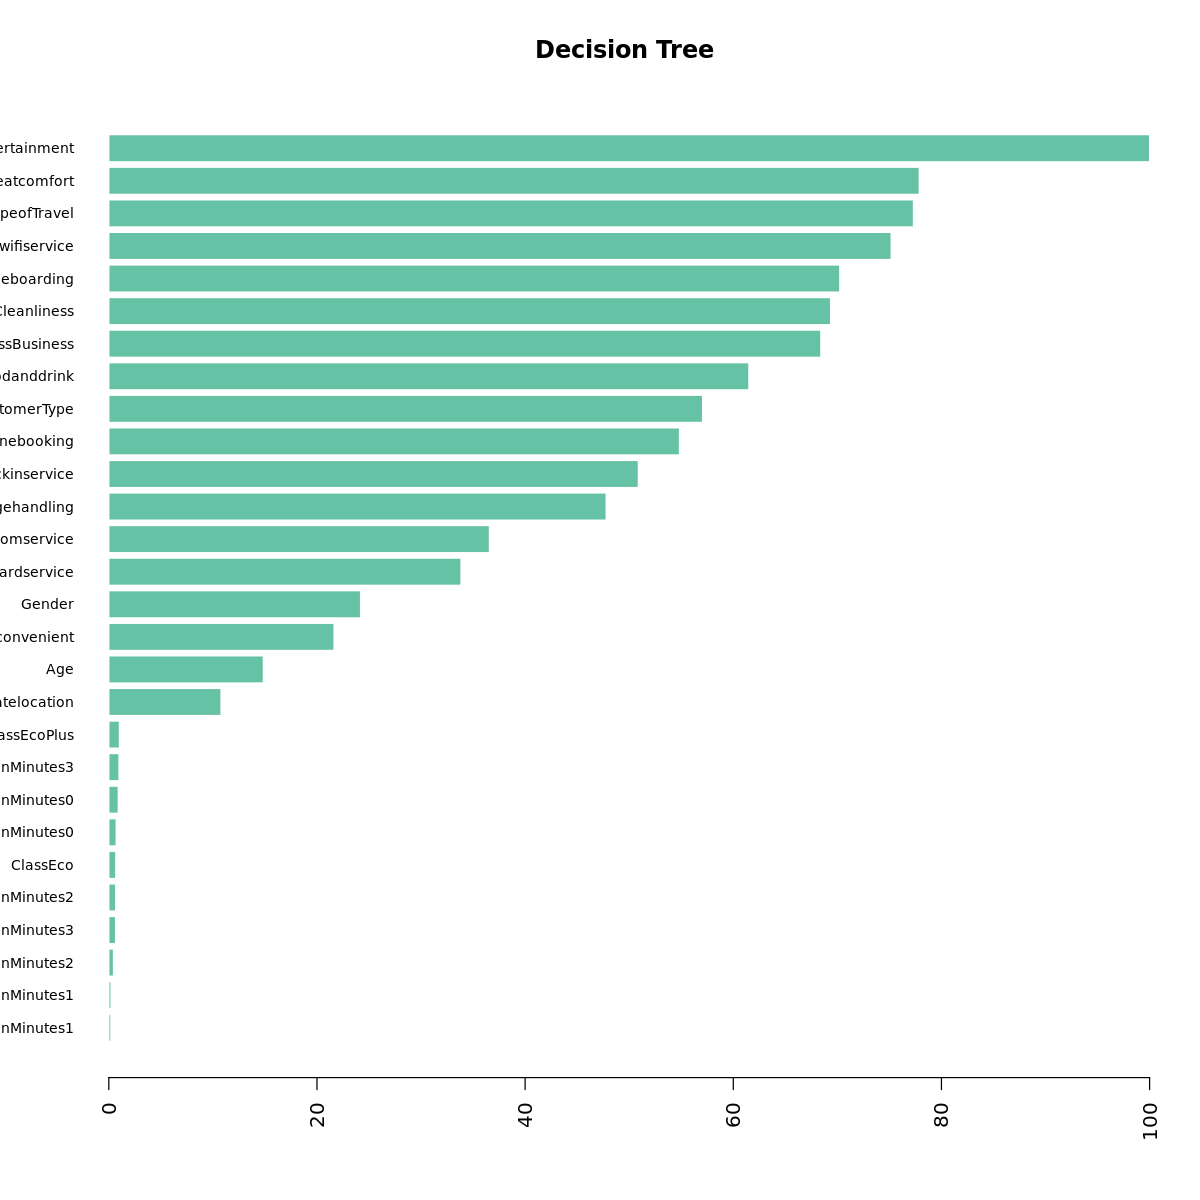

In [5]:
TreeCoeff_plot(DT)

[1] 0.9413946

In [46]:
print(summary(Dtree))


Call:
C5.0.default(x = x_train, y = factor(y_train), trials = 1)


C5.0 [Release 2.07 GPL Edition]  	Sat Nov 12 03:56:00 2022
-------------------------------

Class specified by attribute `outcome'

Read 181832 cases (29 attributes) from undefined.data

Decision tree:

Inflightentertainment > 0.6:
:...ClassBusiness <= 0:
:   :...Inflightwifiservice <= 0.6:
:   :   :...EaseofOnlinebooking > 0.6:
:   :   :   :...Onboardservice <= 0.6: 1 (311/8)
:   :   :   :   Onboardservice > 0.6:
:   :   :   :   :...Gender <= 0:
:   :   :   :       :...Inflightwifiservice <= 0: 0 (2)
:   :   :   :       :   Inflightwifiservice > 0: 1 (130/4)
:   :   :   :       Gender > 0:
:   :   :   :       :...Cleanliness <= 0.6: 1 (84/3)
:   :   :   :           Cleanliness > 0.6:
:   :   :   :           :...Legroomservice <= 0.6:
:   :   :   :               :...Seatcomfort <= 0: 0 (24)
:   :   :   :               :   Seatcomfort > 0: 1 (102/18)
:   :   :   :               Legroomservice > 0.6:
:   :   :   :       

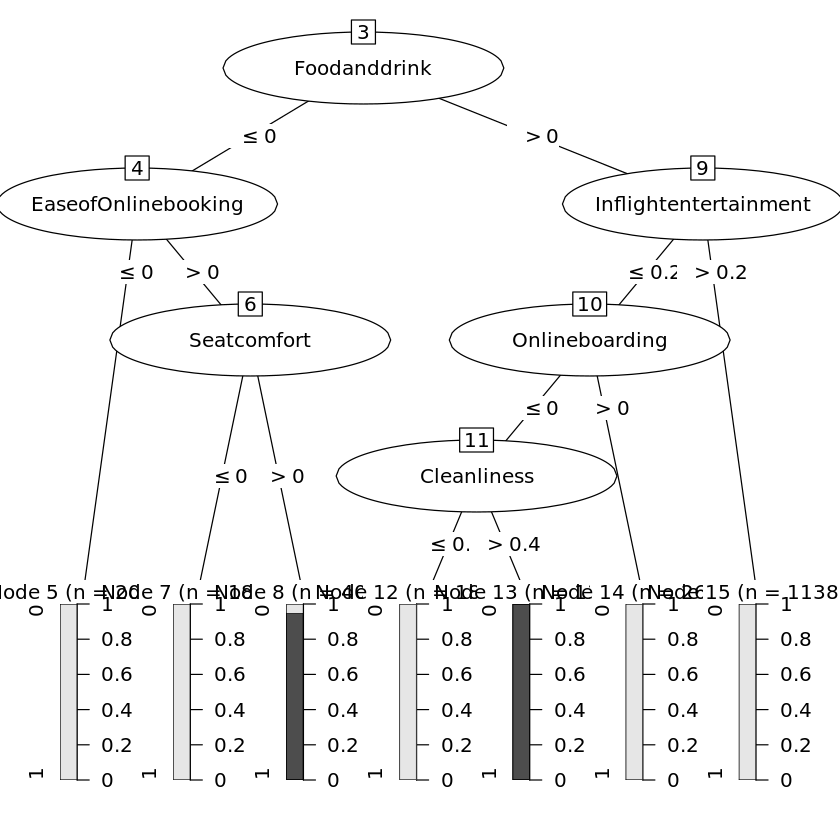

In [24]:
plot(Dtree, subtree = 3)